In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [18]:

data = {
    'Yosh': [22, 35, 47, 52, 46, 25, 34, 41, 29, 50],
    'Staj': [1, 10, 20, 25, 18, 2, 9, 15, 4, 22],
    'Maosh': [200, 800, 1500, 1700, 1400, 250, 750, 1300, 400, 1600],
    'Sinf': ['Oddiy', 'Oddiy', 'Boy', 'Boy', 'Boy', 'Oddiy', 'Oddiy', 'Boy', 'Oddiy', 'Boy']
}

df = pd.DataFrame(data)


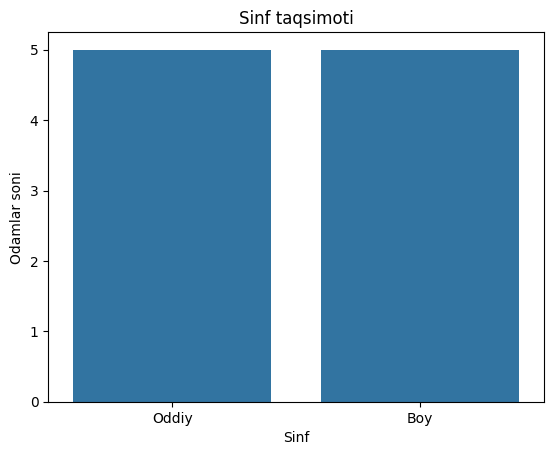

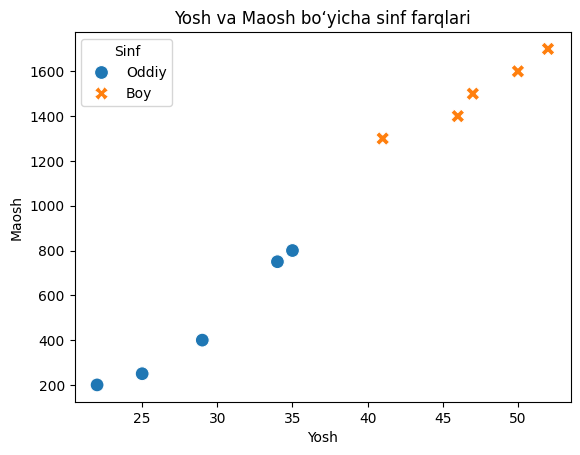

In [19]:
sns.countplot(data=df, x='Sinf')
plt.title("Sinf taqsimoti")
plt.xlabel("Sinf")
plt.ylabel("Odamlar soni")
plt.show()

# Grafik 2: Yosh vs Maosh bo‘yicha scatter plot
sns.scatterplot(data=df, x='Yosh', y='Maosh', hue='Sinf', style='Sinf', s=100)
plt.title("Yosh va Maosh bo‘yicha sinf farqlari")
plt.show()


In [20]:
X = df[['Yosh', 'Staj', 'Maosh']]
y = df['Sinf']

In [21]:
y = y.map({'Oddiy': 0, 'Boy': 1})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = model.predict(X_test)

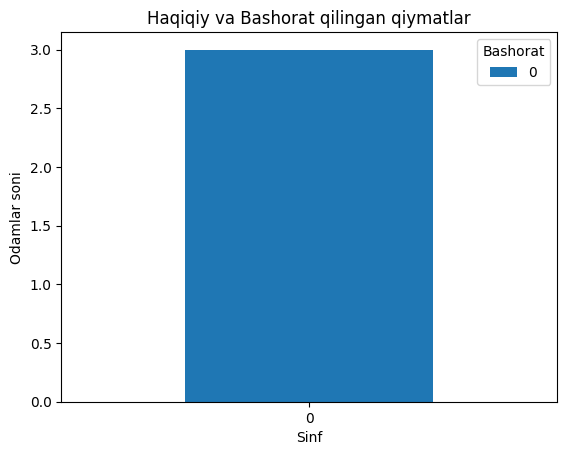

In [26]:
comparison_df = pd.DataFrame({'Haqiqiy': y_test.values, 'Bashorat': y_pred})
comparison_df.value_counts().unstack().plot(kind='bar', rot=0)
plt.title("Haqiqiy va Bashorat qilingan qiymatlar")
plt.xlabel("Sinf")
plt.ylabel("Odamlar soni")
plt.show()


In [27]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
print("Aniqlik:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Aniqlik: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [29]:
new_person = [[30, 5, 600]]
prediction = model.predict(new_person)

if prediction[0] == 1:
    print("Bu odam: Boy")
else:
    print("Bu odam: Oddiy")

Bu odam: Oddiy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
